In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Activation,Dense,Input
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


In [28]:
dataset = read_csv("test.csv.csv")
dataset = dataset.values

In [29]:
X, y = dataset[:, 1:]/255, dataset[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

In [30]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7999, 784) (7999, 10) (2000, 784) (2000, 10)


## NN using Keras Functional API

In [31]:
inp=Input(shape=(784,))
fc1=Dense(256,activation="sigmoid")(inp)
fc2=Dense(64,activation="sigmoid")(fc1)
out=Dense(10,activation="softmax")(fc2)

model=Model(inputs=inp,outputs=out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_23 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [24]:
hist = model.fit(X_train, y_train,
          shuffle=True,
          epochs=40,
          batch_size=128,
          validation_data=(X_test, y_test)
         )

Train on 8000 samples, validate on 2000 samples
Epoch 1/40
8000/8000 [==============================] - 0s 47us/step - loss: 1.2884 - acc: 0.6350 - val_loss: 1.2709 - val_acc: 0.6445
Epoch 2/40
8000/8000 [==============================] - 0s 40us/step - loss: 1.2742 - acc: 0.6440 - val_loss: 1.2566 - val_acc: 0.6430
Epoch 3/40
8000/8000 [==============================] - 0s 45us/step - loss: 1.2603 - acc: 0.6416 - val_loss: 1.2429 - val_acc: 0.6380
Epoch 4/40
8000/8000 [==============================] - 0s 42us/step - loss: 1.2469 - acc: 0.6392 - val_loss: 1.2295 - val_acc: 0.6500
Epoch 5/40
8000/8000 [==============================] - 0s 43us/step - loss: 1.2338 - acc: 0.6509 - val_loss: 1.2170 - val_acc: 0.6445
Epoch 6/40
8000/8000 [==============================] - 0s 50us/step - loss: 1.2213 - acc: 0.6454 - val_loss: 1.2042 - val_acc: 0.6530
Epoch 7/40
8000/8000 [==============================] - 0s 35us/step - loss: 1.2090 - acc: 0.6489 - val_loss: 1.1920 - val_acc: 0.6560
Epoch 8

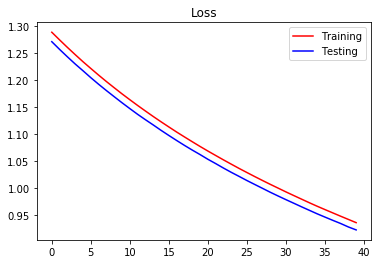

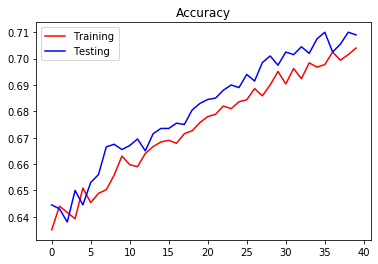

In [25]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Testing')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Testing')
plt.legend()
plt.show()